In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0307 - val_loss: 0.0050
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - val_loss: 0.0034
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_loss: 0.0032
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 0.0027
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 8/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 9/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 11/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 12/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0

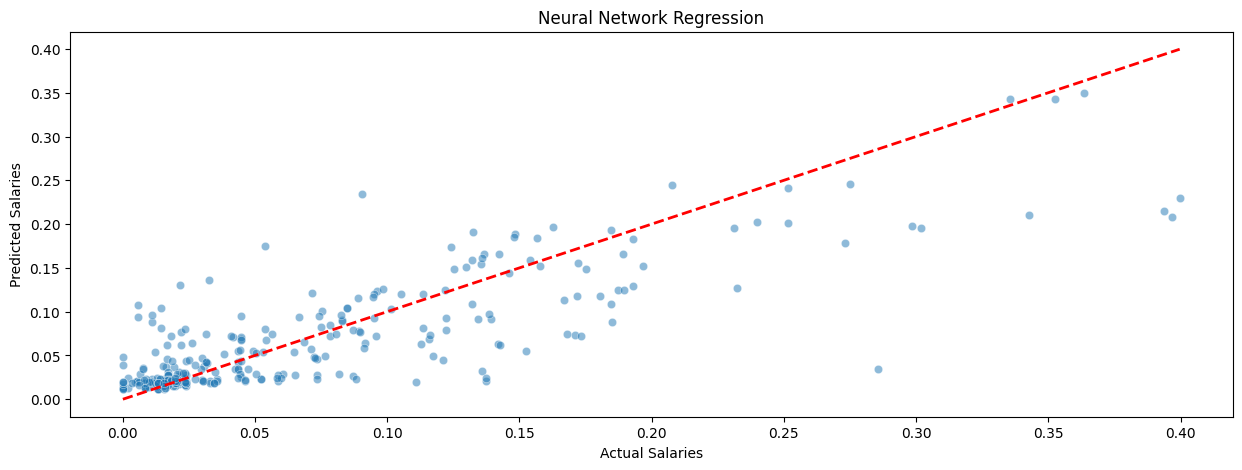

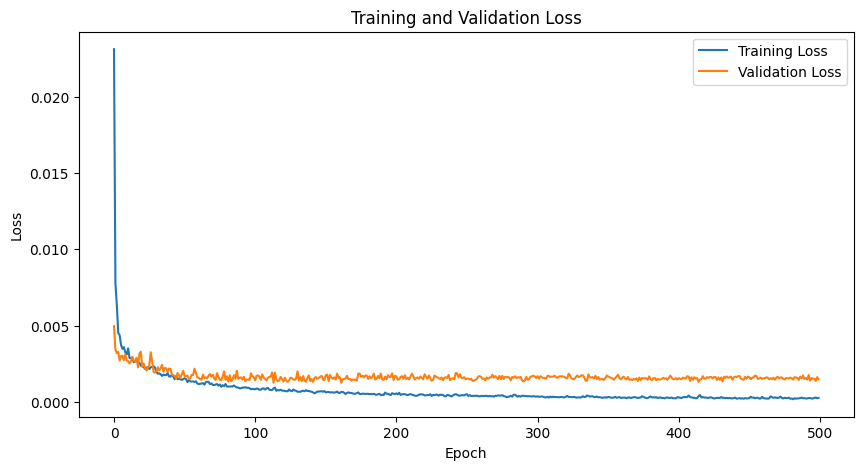

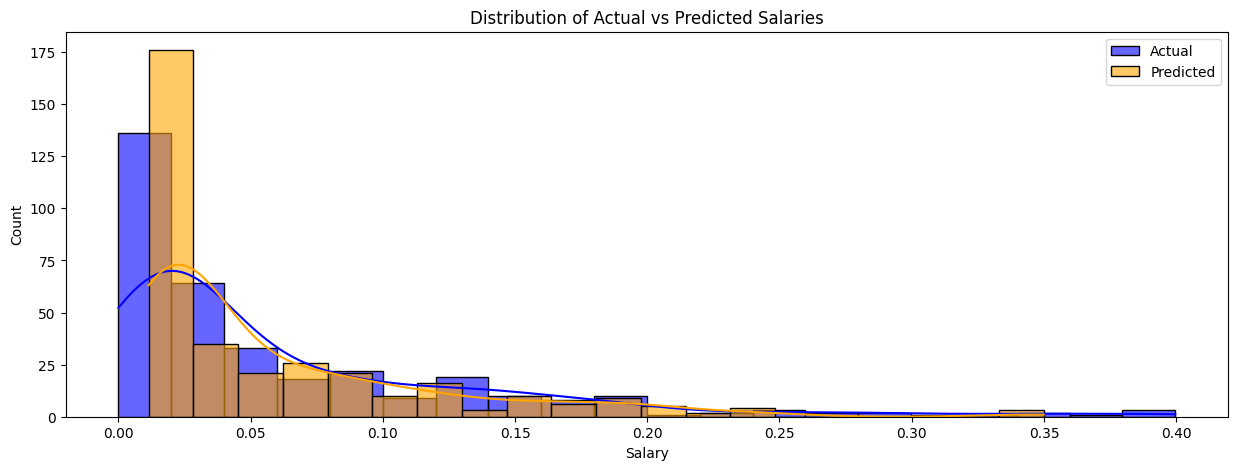

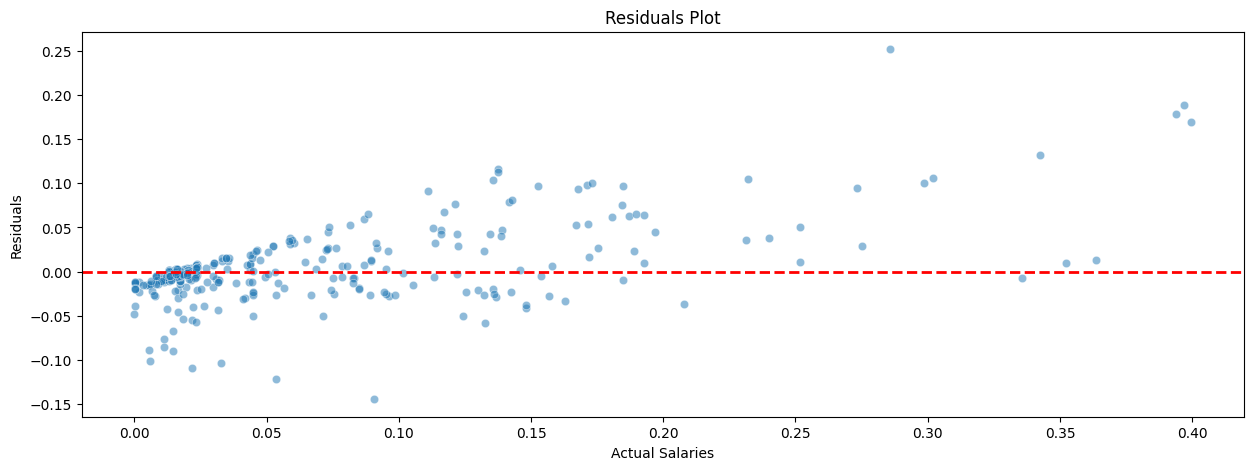

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('drive/MyDrive/test/finaldata.csv')

# Define X and y
X = data.drop(['target', 'salary', 'debut', 'birth', 'name', 'Pos', 'G', 'ORB'], axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model with improved architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network - Mean Squared Error: {mse_nn}, R^2 Score: {r2_nn}')

# Visualize the results
plt.figure(figsize=(15, 5))

# Neural Network Plot
sns.scatterplot(x=y_test, y=y_pred_nn.flatten(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Neural Network Regression')
plt.show()

# Plot the training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Additional Visualizations

# Distribution of Predicted vs Actual Values
plt.figure(figsize=(15, 5))
sns.histplot(y_test, color='blue', label='Actual', kde=True, alpha=0.6)
sns.histplot(y_pred_nn.flatten(), color='orange', label='Predicted', kde=True, alpha=0.6)
plt.xlabel('Salary')
plt.title('Distribution of Actual vs Predicted Salaries')
plt.legend()
plt.show()

# Residuals Plot
residuals = y_test - y_pred_nn.flatten()
plt.figure(figsize=(15, 5))
sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


Training MSE: 0.0006400080821327951, R^2 Score: 0.9052428956703615
Validation MSE: 0.0012974000066718094, R^2 Score: 0.7738987217741761
Test MSE: 0.0016860606667644619, R^2 Score: 0.7006124829583051


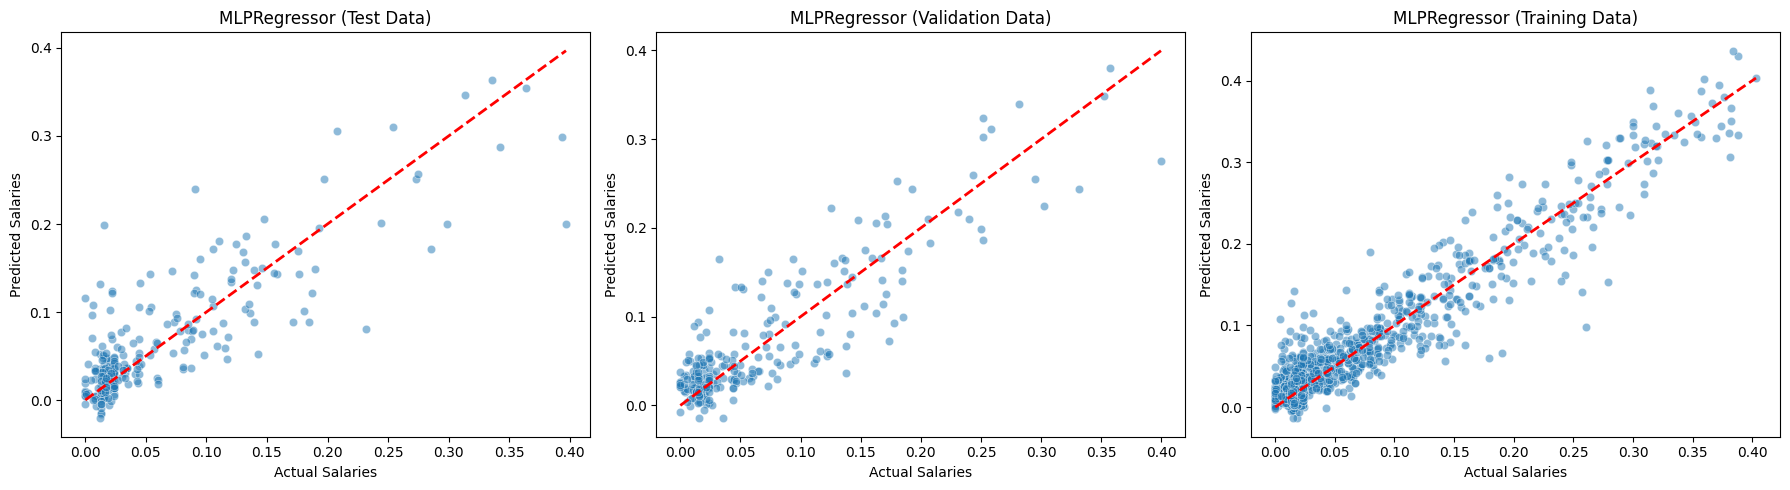

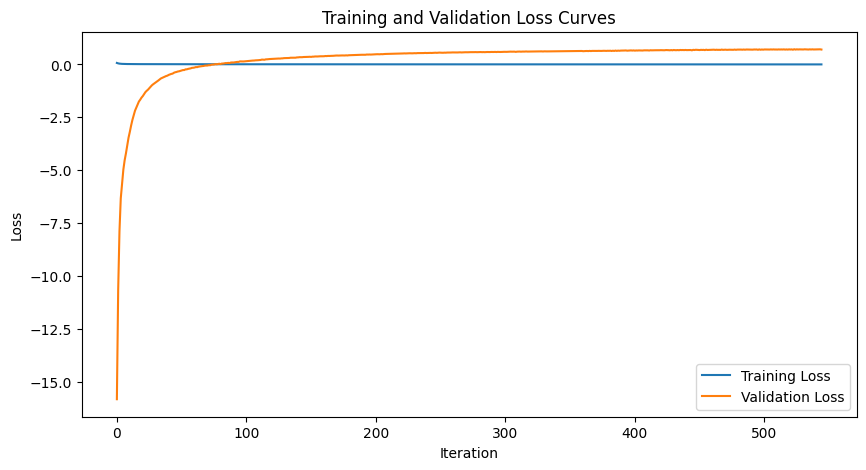

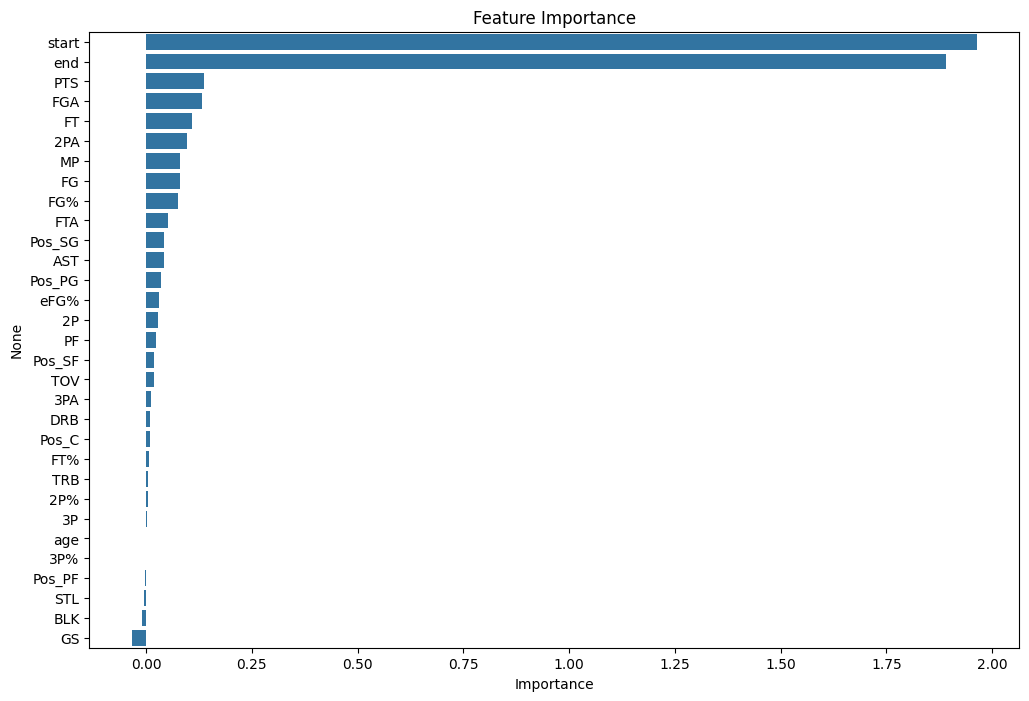

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('drive/MyDrive/test/finaldata.csv')

# Define X and y
X = data.drop(['target', 'salary', 'debut', 'birth', 'name', 'Pos', 'G', 'ORB'], axis=1)
y = data['target']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLPRegressor model with dropout and stronger regularization
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 25),  # Reduce complexity
                         activation='relu',
                         solver='adam',
                         max_iter=2000,
                         random_state=42,
                         early_stopping=True,
                         validation_fraction=0.1,
                         n_iter_no_change=20,
                         alpha=0.05,  # Stronger regularization
                         learning_rate='adaptive',
                         learning_rate_init=0.0005)  # Lower learning rate

mlp_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = mlp_model.predict(X_train_scaled)
y_pred_valid = mlp_model.predict(X_valid_scaled)
y_pred_test = mlp_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_valid = r2_score(y_valid, y_pred_valid)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}, R^2 Score: {r2_train}')
print(f'Validation MSE: {mse_valid}, R^2 Score: {r2_valid}')
print(f'Test MSE: {mse_test}, R^2 Score: {r2_test}')

# Visualize the results
plt.figure(figsize=(18, 5))

# Test data plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('MLPRegressor (Test Data)')

# Validation data plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_valid, y=y_pred_valid, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('MLPRegressor (Validation Data)')

# Training data plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('MLPRegressor (Training Data)')

plt.tight_layout()
plt.show()

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(mlp_model.loss_curve_, label='Training Loss')
if hasattr(mlp_model, 'validation_scores_'):
    plt.plot(mlp_model.validation_scores_, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# Feature importance visualization using permutation importance
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)
feature_importances = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()
